<a href="https://colab.research.google.com/github/devilgupta/C115-PR/blob/main/C115PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upload=files.upload()

Saving c115-pr.csv to c115-pr.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("c115-pr.csv")

velocity_list = df["Velocity"].tolist()
escaped_list = df["Escaped"].tolist()

fig=px.scatter(x=velocity_list,y=escaped_list)
fig.show()

In [4]:
import numpy as np
velocity_array = np.array(velocity_list)
escaped_array = np.array(escaped_list)

m,c = np.polyfit(velocity_array, escaped_array,1)

y=[]
for x in velocity_array:
  y_value=m*x+c
  y.append(y_value)

fig=px.scatter(x=velocity_array,y=escaped_array)
fig.update_layout(shapes=[
                          dict(
                              type='line',
                               y0=min(y),y1=max(y),
                               x0=min(velocity_array),x1=max(velocity_array)
                          )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



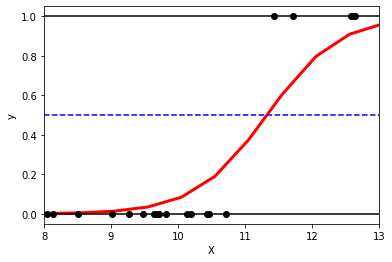

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X=np.reshape(velocity_list,(len(velocity_list),1))
Y=np.reshape(escaped_list,(len(escaped_list),1))

lr= LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(),Y,color="black",zorder=20)

def model(x):
  return 1/ (1+np.exp(-x))

X_test = np.linspace(0,100,200)
chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test,chances,color="red",linewidth=3)
plt.axhline(y=0,color='k',linestyle='-')
plt.axhline(y=1,color='k',linestyle='-')
plt.axhline(y=0.5,color='b',linestyle='--')

plt.axvline(x=X_test[165],color='b',linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(8,13)
plt.show()

In [7]:
escape_rate = float(input("Enter velocity here:"))
chances=model(escape_rate * lr.coef_ + lr.intercept_).ravel()[0]
if chances <= 0.01:
  print("The velocity will not result in a escape")
elif chances >=1:
  print("The velocity will result in a escape")
elif chances <0.5:
  print("The velocity may not result in a escape")
else:
  print("the velocity may result in a escape")

Enter velocity here:0.4
The velocity will not result in a escape
